In [1]:
#! pip install pyoso

In [2]:
from dotenv import load_dotenv
import os
import pandas as pd
from pyoso import Client

load_dotenv()
OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)

/Users/cerv1-air/anaconda3/lib/python3.11/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.3.0) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


In [3]:
query = """
    SELECT 
        m.metric_name as metric_name,
        tm.sample_date as date,
        tm.amount as amount
    FROM timeseries_metrics_by_project_v0 AS tm
    JOIN metrics_v0 AS m ON tm.metric_id = m.metric_id
    JOIN projects_v1 AS p ON tm.project_id = p.project_id
    WHERE p.project_name = 'uniswap'
    ORDER BY tm.sample_date DESC
"""
results = client.query(query)

In [4]:
df = pd.DataFrame(results)
df['date'] = pd.to_datetime(df['date'])
df.tail()

,metric_name,date,amount
46001,GITHUB_stars_over_30_day_window,2017-11-15,1
46002,GITHUB_repositories_weekly,2017-11-13,1
46003,GITHUB_stars_weekly,2017-11-13,1
46004,GITHUB_repositories_monthly,2017-11-01,1
46005,GITHUB_stars_monthly,2017-11-01,3


In [7]:
df.groupby('metric_name')['date'].max().sort_values().tail()

metric_name
GITHUB_avg_time_to_first_response_over_90_day_window        2025-02-18
GITHUB_avg_time_to_first_response_over_180_day_window       2025-02-18
GITHUB_avg_prs_time_to_merge_over_90_day_window             2025-02-18
OPTIMISM_active_addresses_aggregation_over_180_day_window   2025-02-18
OPTIMISM_transactions_over_90_day_window                    2025-02-18
Name: date, dtype: datetime64[ns]

<Axes: xlabel='date'>

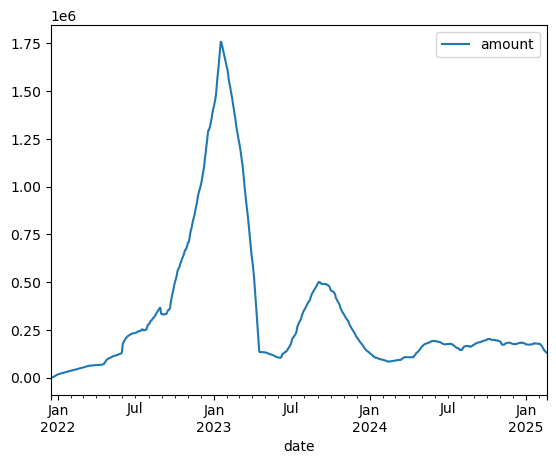

In [6]:
(df.query("metric_name == 'OPTIMISM_transactions_over_90_day_window'").plot(kind='line', x='date', y='amount'))